## BARREL Spectroscopy Crib


### Intro 
In this guide we will explore the spectroscopy functions provided by the BARREL Spectroscopy functions in pySPEDAS. In general, these functions can be accessed as `pyspedas.barrel.spec.<function_name>`. These functions have been ported from the BARREL module of the IDL SPEDAS package. The examples in this notebook are derived from `barrel_spectroscopy_crib.pro`.

### Setup

>**_NOTE:_** The `%matplotlib ipympl` line will enable interactive plots. This is not required, but will allow you to use your cursor to see exact times and values. The `ipympl` package may need to be installed separately from pyspedas.

In [1]:
%matplotlib ipympl
import pyspedas, pytplot

### Example 1: bkg time intervals; exponential spectrum, slow spectra

> **_Original IDL syntax:_**\
barrel_spectroscopy,spectest1,'2013-01-17/00:50:00',9.,'1G',/slow,numbkg=2,fitrange=[80.,2500.],saveme='spectest1.sav'

> 


In this example we will download 9 hours of slow spectra data from payload 1G starting at `2013-01-17/00:50:00` using exponential spectrum.

First, the we define the define a `trange` variable and load the CDF files. We get get both the SSPC and FSPC CDF files:

In [2]:
trange = ["2013-01-17/00:50:00", "2013-01-17/09:50:00"]
pyspedas.barrel.sspc(trange, "1G")
pyspedas.barrel.fspc(trange, "1G")

22-Nov-24 21:49:00: File is current: barrel_data/l2/1g/sspc/bar_1g_l2_sspc_20130117_v10.cdf
22-Nov-24 21:49:00: File is current: barrel_data/l2/1g/fspc/bar_1g_l2_fspc_20130117_v10.cdf


['brl1G_Quality', 'brl1G_FSPC1', 'brl1G_FSPC2', 'brl1G_FSPC3', 'brl1G_FSPC4']

Using the `tplot_names()` function lists the variable names that have been downloaded (we are looking for `brl1G_SSPC`).

In [4]:
pyspedas.tplot_names()

0 : brl1G_Quality
1 : brl1G_SSPC
2 : brl1G_Peak_511
3 : brl1G_SSPC_UNCAL
4 : brl1G_FSPC1
5 : brl1G_FSPC2
6 : brl1G_FSPC3
7 : brl1G_FSPC4


['brl1G_Quality',
 'brl1G_SSPC',
 'brl1G_Peak_511',
 'brl1G_SSPC_UNCAL',
 'brl1G_FSPC1',
 'brl1G_FSPC2',
 'brl1G_FSPC3',
 'brl1G_FSPC4']

Now that the data have been downloaded, we can plot the SSPC data: 

22-Nov-24 21:49:01: /home/wrexroad/anaconda3/envs/pyspedas/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(



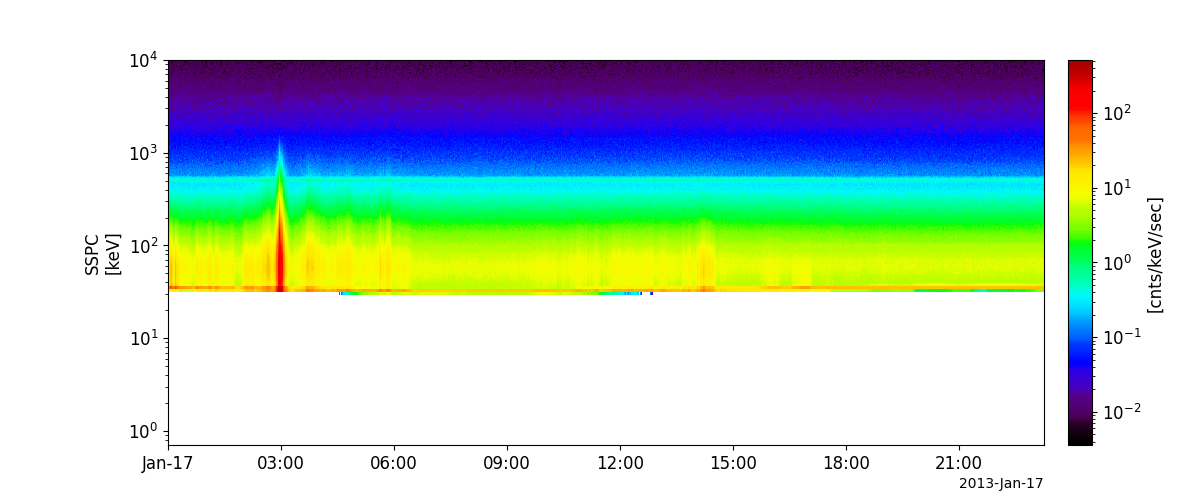

22-Nov-24 21:49:03: /home/wrexroad/anaconda3/envs/pyspedas/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(



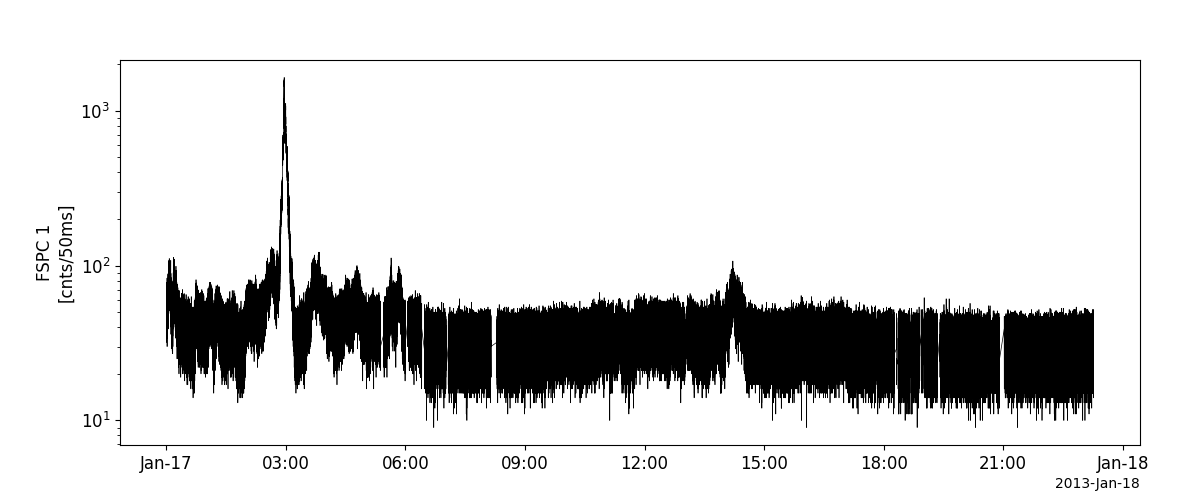

In [5]:
pytplot.tplot('brl1G_SSPC')
pytplot.tplot('brl1G_FSPC1')

Using the plots, identify the event and background time periods:

In [6]:
event_period=("2013-01-17/01:54:00", "2013-01-17/03:24:00")
background_periods=[("2013-01-17/17:25:00", "2013-01-17/20:35:00"), ("2013-01-18/09:35:00", "2013-01-18/12:04:00")]

Next we can initalize our spectroscopy data object `specstruct`:

In [7]:
specstruct = pyspedas.barrel.spec.barrel_sp_make(tplot_var="brl1G_SSPC", event_periods=event_period, background_periods=background_periods)

Once the `specstruct` has been created, we can build the spectra from the CDF files that have been loaded (this will also download rate counter and ephemeris file automatically):

In [8]:
pyspedas.barrel.spec.barrel_sp_collect_spectra(specstruct)

22-Nov-24 21:49:06: File is current: barrel_data/l2/1g/ephem/bar_1g_l2_ephm_20130117_v10.cdf


35.18


22-Nov-24 21:49:06: File is current: barrel_data/l2/1g/rcnt/bar_1g_l2_rcnt_20130117_v10.cdf
22-Nov-24 21:49:06: /home/wrexroad/anaconda3/envs/pyspedas/lib/python3.12/site-packages/pyspedas/projects/barrel/spec.py:190: RuntimeWarning: invalid value encountered in sqrt
  ss["src_spec_err"] = ( np.sqrt(raw-0.25) + np.sqrt(raw+0.75) + 1. ) / 2.

22-Nov-24 21:49:06: File is current: barrel_data/l2/1g/rcnt/bar_1g_l2_rcnt_20130117_v10.cdf
22-Nov-24 21:49:07: Downloading https://spdf.gsfc.nasa.gov/pub/data/barrel/l2/1g/rcnt/bar_1g_l2_rcnt_20130118_v10.cdf to barrel_data/l2/1g/rcnt/bar_1g_l2_rcnt_20130118_v10.cdf
22-Nov-24 21:49:07: Download complete: barrel_data/l2/1g/rcnt/bar_1g_l2_rcnt_20130118_v10.cdf
22-Nov-24 21:49:07: /home/wrexroad/anaconda3/envs/pyspedas/lib/python3.12/site-packages/pyspedas/projects/barrel/spec.py:210: RuntimeWarning: invalid value encountered in sqrt
  ss["bkg_spec_err"] = (np.sqrt(raw-0.25) + np.sqrt(raw+0.75) + 1. ) / 2.



The `specstrut` object contains a spectrum which can be put into a tplot variable and plotted:

In [ ]:
ts, raw_cnts, energy_levels = pytplot.get_data('brl1G_SSPC')
pytplot.store_data("brl1G_Event_Spec", data={'x':energy_levels, 'y':specstruct["src_spec"]})
pytplot.options("brl1G_Event_Spec", opt_dict={"name": "Event Spectrum", "ytitle": "cnts/keV/sec"})
pytplot.tplot("brl1G_Event_Spec")